In [1]:
from sklearn.datasets import make_blobs
# centers = 2 (2 class), cluster_std 클러스터의 표준편차
X,y = make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=0)

In [2]:
print(X)

[[ 3.1368855   1.56592763]
 [ 1.4815332   0.67875364]
 [ 0.3498724   4.69253251]
 [ 0.5323772   3.31338909]
 [ 2.64928242  1.05613497]
 [ 1.2091013   3.53566548]
 [ 0.99914934  4.2101954 ]
 [ 3.01673853  1.63792106]
 [ 0.78260667  4.15263595]
 [ 1.65356269  0.55288877]
 [ 0.802314    4.38196181]
 [ 1.8706766   0.77797407]
 [ 1.08040757  4.79210685]
 [ 0.5226209   4.32976003]
 [ 1.92126584  1.29889186]
 [ 3.24683991  1.3699034 ]
 [ 2.61858548  0.35769791]
 [ 0.64003985  4.12401075]
 [ 1.39731382  0.66687136]
 [ 1.67030948  1.16728826]
 [ 1.05374379  4.49286859]
 [ 0.82049381  4.33187   ]
 [ 1.68548602  1.66917096]
 [ 0.39369516  4.75420057]
 [ 2.31690585  0.81189049]
 [ 0.92466065  4.50908658]
 [ 1.68289011  0.48444439]
 [ 0.98152009  5.19672257]
 [ 1.19820169  4.47062449]
 [ 2.20438661  1.56085661]
 [ 2.24348029  0.34796326]
 [ 1.00952869  4.45502328]
 [ 1.50307585  0.9237462 ]
 [ 2.25327088  0.35113291]
 [ 1.83769075  1.82229552]
 [ 1.56565986  4.21382491]
 [ 1.71810119  0.91357894]
 

In [3]:
print(y)

[1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1]


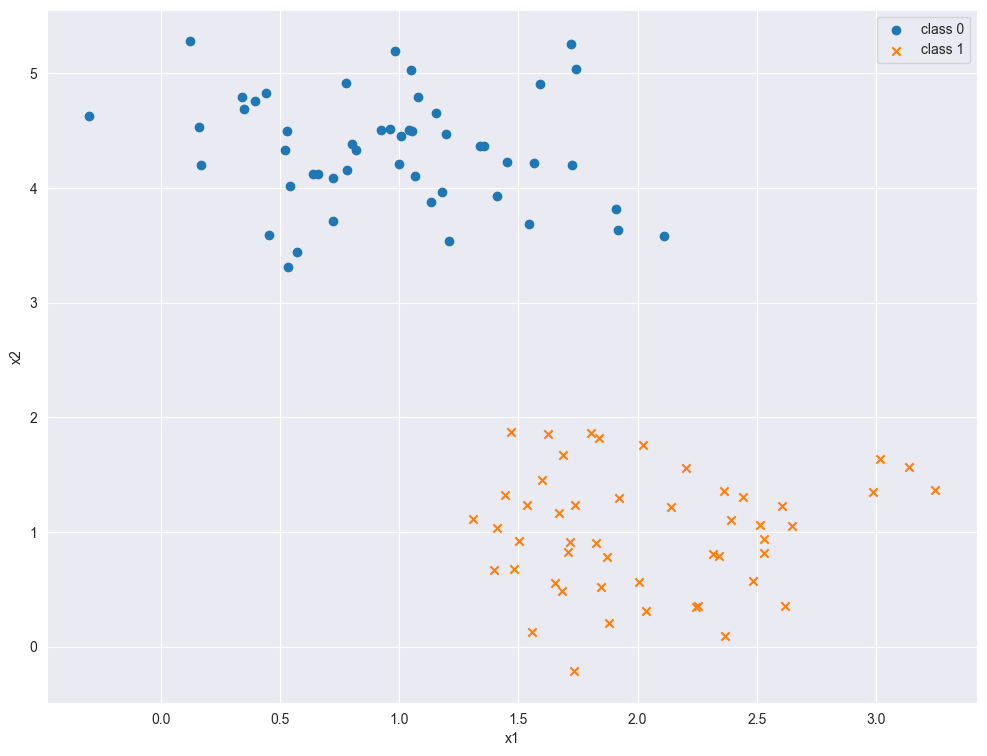

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.scatter(X[y == 0,0], X[y == 0,1], marker='o', label='class 0')
plt.scatter(X[y == 1,0], X[y == 1,1], marker='x', label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=10)


In [6]:
from sklearn.svm import SVC
model = SVC(kernel='linear').fit(X_train, y_train)

In [8]:
# 클래스별 서포트 벡터의 개수(0 2개, 1 1개)
model.n_support_

array([2, 1])

In [9]:
# 서포트 벡터의 인덱스
model.support_

array([18, 43, 13])

In [11]:
# 서포트 벡터의 값
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [17]:
import numpy as np

def plot_svc(model,ax=None):
    if ax==None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고
    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치

    #판별함수에 입력하고
    P = model.decision_function(xy).reshape(X.shape)

    # decision boundary와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P,
               levels=[-1, 0, 1], colors='k',
               linestyles=['--', '-', '--'])

    # 서포트 벡터 그리기
    ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

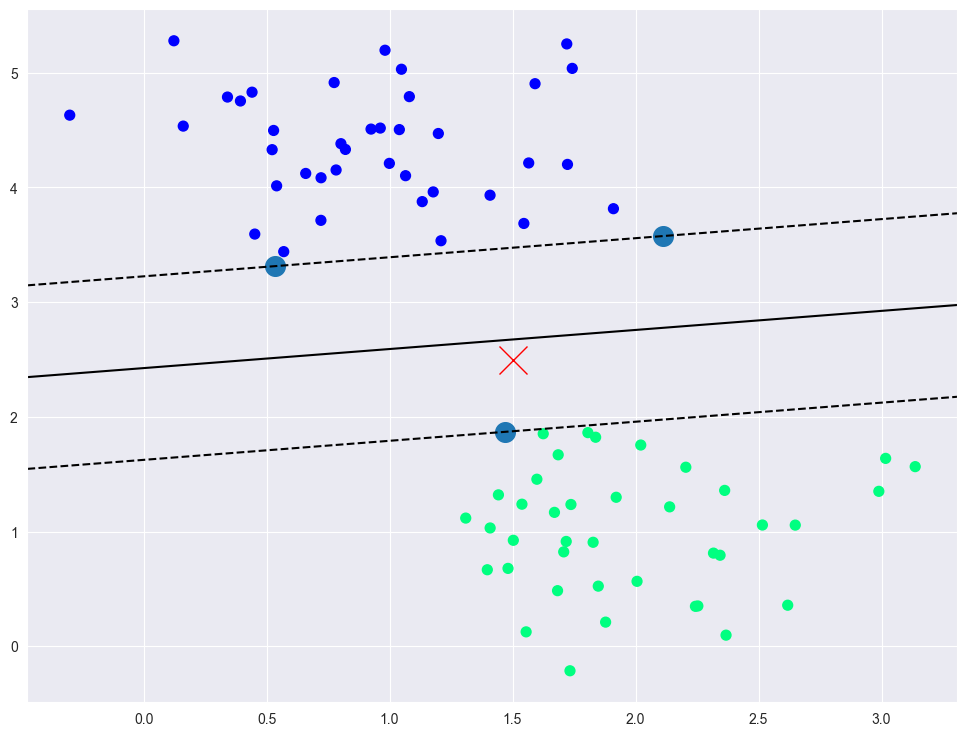

In [18]:
plt.figure(figsize=(12,9))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='winter')

# X_new 데이터는 어느 클래스로 분류될까요?
X_new = [1.5, 2.5]
plt.plot(X_new[0], X_new[1], 'x', color='red', markersize=20)
plot_svc(model)

In [19]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.1, 1, 10, 100], 'gamma': [0.00001, 0.001, 0.01, 1, 10]}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)
print("Best Parameters:\n", grid.best_params_)
print("Best Estimator:\n", grid.best_estimator_)

Best Parameters:
 {'C': 0.1, 'gamma': 1e-05}
Best Estimator:
 SVC(C=0.1, gamma=1e-05)


In [20]:
model = grid.best_estimator_
model

SVC(C=0.1, gamma=1e-05)

In [21]:
print("학습용: ", model.score(X_train, y_train))
print("검증용: ", model.score(X_test, y_test))

학습용:  1.0
검증용:  1.0


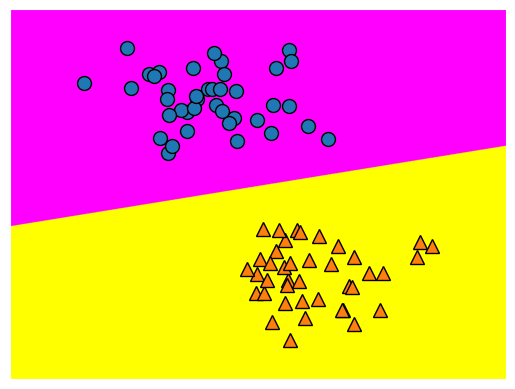

In [22]:
import mglearn
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)
mglearn.plots.plot_2d_classification(model, X_train, cm='spring')